In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
%matplotlib inline

In [3]:
# input data reading
d = pd.read_csv('bank-full.csv',delimiter=';')
d.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<AxesSubplot:title={'center':'yes-no balance in target value'}, xlabel='y', ylabel='count'>

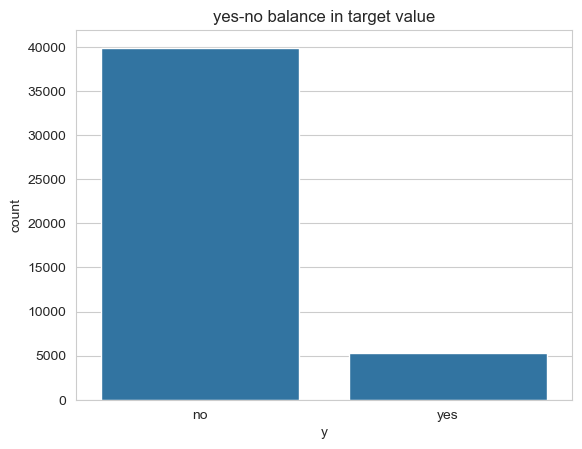

In [4]:
# target value balance depiction
fig,ax = plt.subplots()
ax.set_title('yes-no balance in target value')
sns.countplot(x='y',data=d)

In [5]:
# statistical figures of input data
d.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# search for any duplicated values
np.any(d.duplicated())

False

In [9]:
# search for unknown values
np.sum(d=='unknown')

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [10]:
# removing columns with too many unknown values
d.drop(['contact','poutcome'],axis=1,inplace=True)

In [11]:
# removing rows where their 'job' or 'education' features are unknown
d.drop(d.loc[d['job']=='unknown'].index,inplace=True)
d.drop(d.loc[d['education']=='unknown'].index,inplace=True)

In [13]:
# encoding target column to numerical values
d['y'].replace(['yes','no'],[1,0],inplace=True)
d.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,0
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,0


Text(0.5, 1.0, 'job counts')

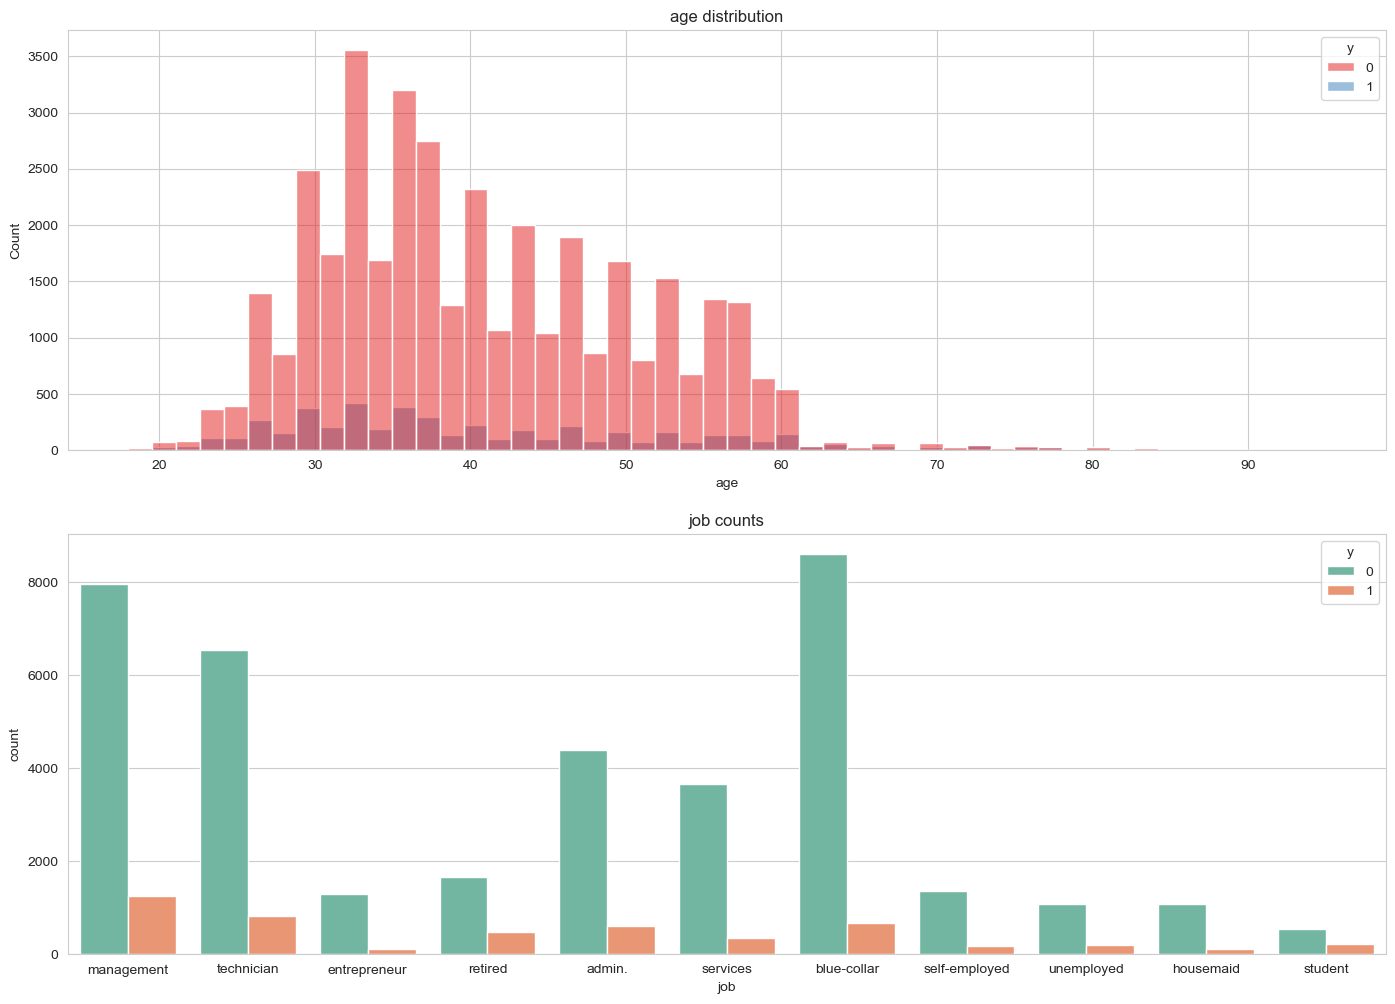

In [14]:
# age and job distribution according to target value
fig,ax = plt.subplots(2,1,figsize=[17,12])
sns.histplot(x='age',hue='y', bins=50,data=d,ax=ax[0],palette='Set1')
ax[0].set_title('age distribution')
sns.countplot(x='job',hue='y', data=d,ax=ax[1],palette='Set2')
ax[1].set_title('job counts')

Text(0.5, 1.0, 'education status counts')

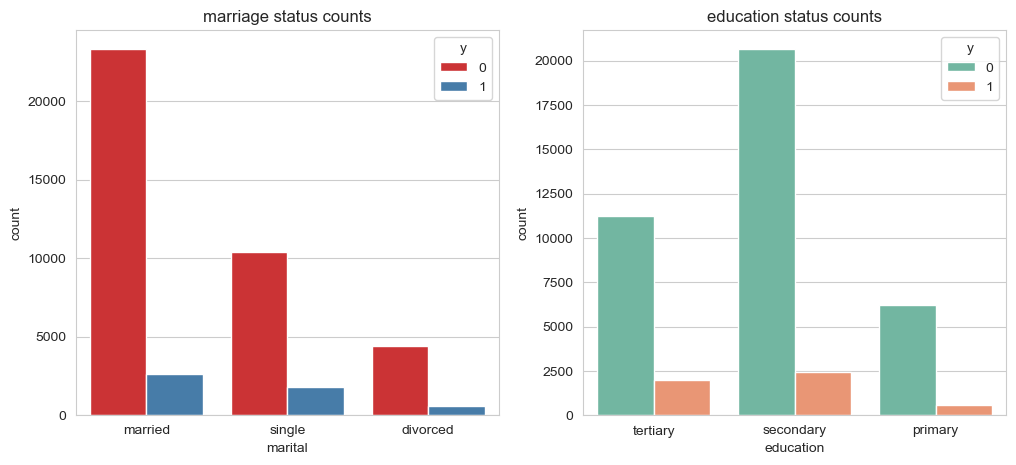

In [15]:
# marriage and education status distribution according to target value
fig,ax = plt.subplots(1,2,figsize=[12,5])
sns.countplot(x='marital',hue='y', data=d,ax=ax[0],palette='Set1')
ax[0].set_title('marriage status counts')
sns.countplot(x='education',hue='y', data=d,ax=ax[1],palette='Set2')
ax[1].set_title('education status counts')

Text(0.5, 1.0, 'loan status counts')

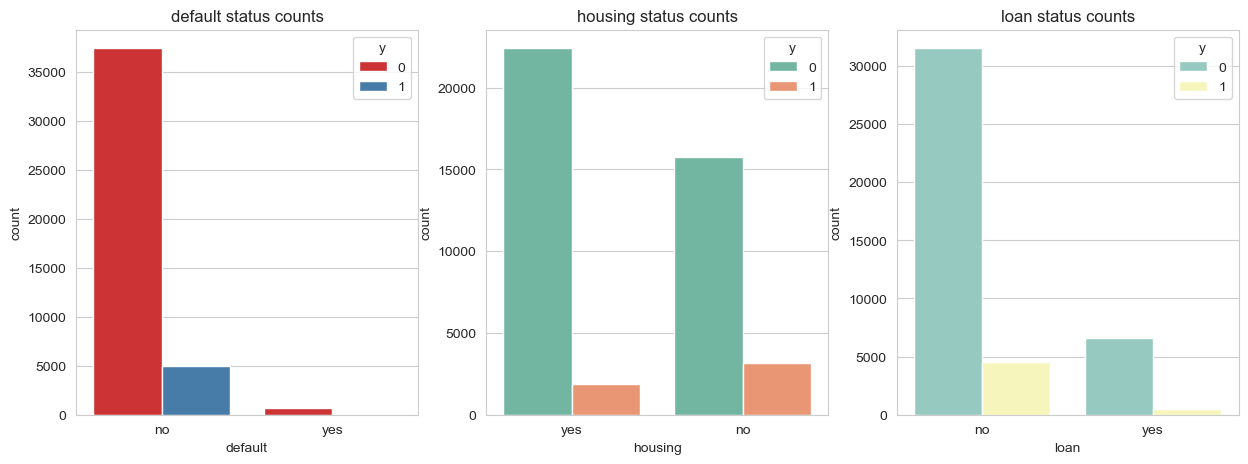

In [16]:
# default, housing and loan status distribution according to target value
fig,ax = plt.subplots(1,3,figsize=[15,5])
sns.countplot(x='default',hue='y', data=d,ax=ax[0],palette='Set1')
ax[0].set_title('default status counts')
sns.countplot(x='housing',hue='y', data=d,ax=ax[1],palette='Set2')
ax[1].set_title('housing status counts')
sns.countplot(x='loan',hue='y', data=d,ax=ax[2],palette='Set3')
ax[2].set_title('loan status counts')

Text(0.5, 1.0, 'age-marital boxplot')

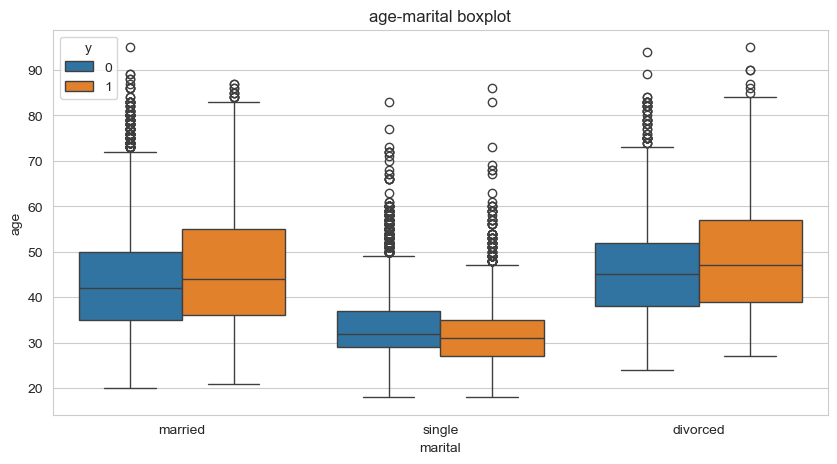

In [17]:
# marriage-oriented age distribution
fig,ax = plt.subplots(figsize=[10,5])
sns.boxplot(x='marital',y='age', data=d,hue='y')
ax.set_title('age-marital boxplot')

Text(0.5, 1.0, 'age-education boxplot')

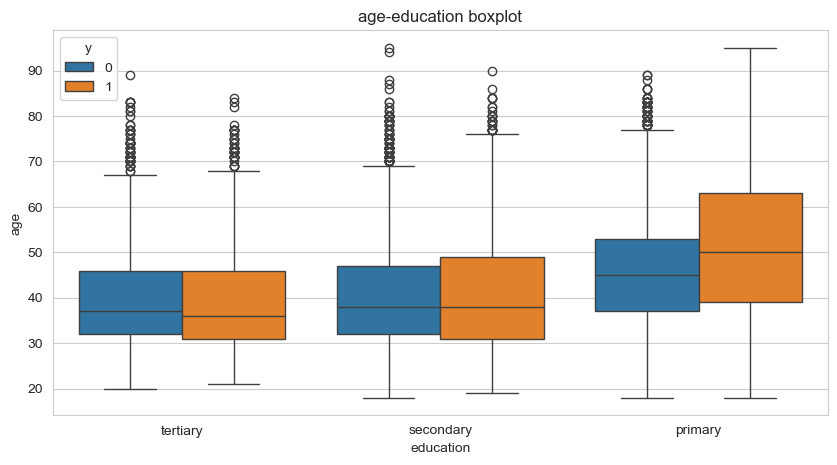

In [18]:
# education-oriented age distribution
fig,ax = plt.subplots(figsize=[10,5])
sns.boxplot(x='education',y='age', data=d,hue='y')
ax.set_title('age-education boxplot')

Text(0.5, 1.0, 'age-job boxplot')

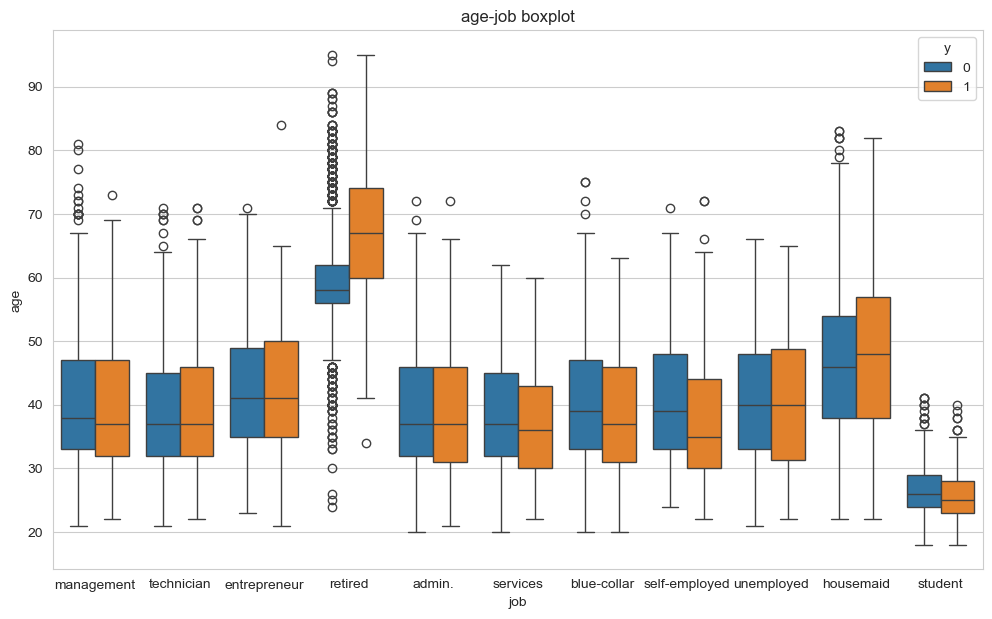

In [19]:
# job-oriented age distribution
fig,ax = plt.subplots(figsize=[12,7])
sns.boxplot(x='job', y='age', data=d,hue='y')
ax.set_title('age-job boxplot')

<AxesSubplot:>

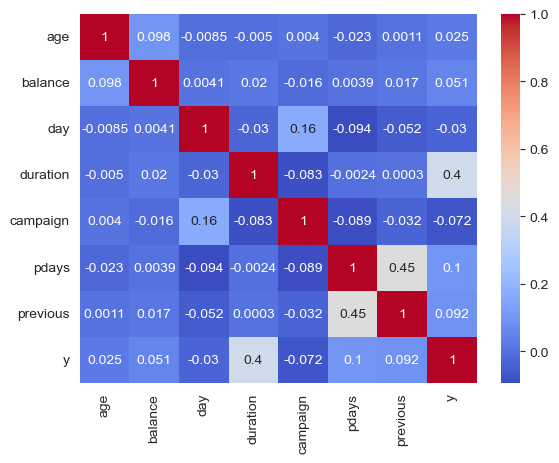

In [20]:
# correlation vlaues among numerical features
d_corr = d.select_dtypes(include='number').corr()
sns.heatmap(d_corr,annot=True,cmap='coolwarm')

<AxesSubplot:xlabel='loan', ylabel='housing'>

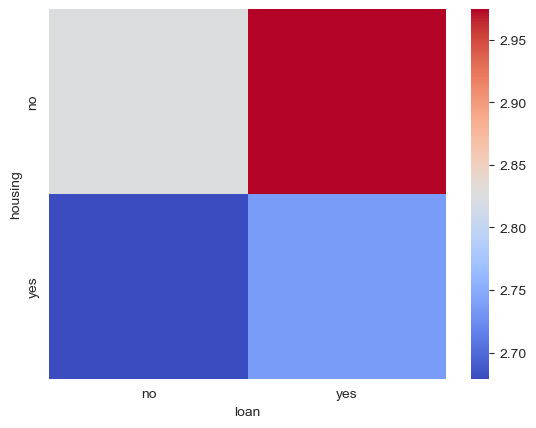

In [21]:
# house and load status comparison
d_mat1 = d.pivot_table(index='housing',columns='loan',values='campaign')
sns.heatmap(d_mat1,cmap='coolwarm')

<AxesSubplot:xlabel='job', ylabel='education'>

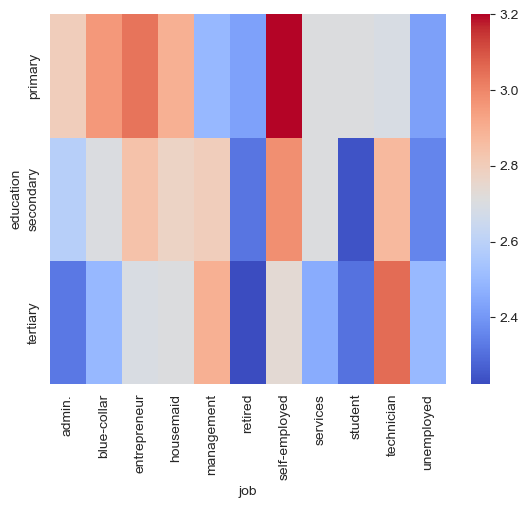

In [22]:
# education and job status comparison
d_mat1 = d.pivot_table(index='education',columns='job',values='campaign')
sns.heatmap(d_mat1,cmap='coolwarm')

In [23]:
# convert categorical data to dummy variables
d1 = pd.get_dummies(data=d)
# splitting features and target values
X = d1.drop(columns='y')
y = d1.y

In [24]:
# classification by random forest
# simple train and test strategy
rfc = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(f'total number of test cases are: {y_test.size}')
print(f'Confusion matrix is: \n {confusion_matrix(y_test,rfc_pred)}')
print('\n')
print(f'Some other metrics are evaluated as: \n {classification_report(y_test,rfc_pred)}')
print('\n')
print(f'Overal accuracy is {accuracy_score(y_test,rfc_pred)}')

total number of test cases are: 12958
Confusion matrix is: 
 [[11104   325]
 [  976   553]]


Some other metrics are evaluated as: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11429
           1       0.63      0.36      0.46      1529

    accuracy                           0.90     12958
   macro avg       0.77      0.67      0.70     12958
weighted avg       0.89      0.90      0.89     12958



Overal accuracy is 0.8995987035036271


In [32]:
# random forest hyper parameters optimization

# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(100,1000,100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Fani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fani\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Fani\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Fani\anaconda3\lib\site-packages\sklea

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   random_state=42, verbose=2)

In [33]:
# best set of parameters
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'bootstrap': True}

In [34]:
# prediction with best parameters
optimized_rfc = rf_random.best_estimator_
rfc_new_pred = optimized_rfc.predict(X_test)
print(f'Confusion matrix is: \n {confusion_matrix(y_test,rfc_new_pred)}')
print('\n')
print(f'Some other metrics are evaluated as: \n {classification_report(y_test,rfc_new_pred)}')
print('\n')
print(f'Overal accuracy is {accuracy_score(y_test,rfc_new_pred)}')

Confusion matrix is: 
 [[11139   290]
 [ 1010   519]]


Some other metrics are evaluated as: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11429
           1       0.64      0.34      0.44      1529

    accuracy                           0.90     12958
   macro avg       0.78      0.66      0.69     12958
weighted avg       0.88      0.90      0.89     12958



Overal accuracy is 0.8996758759067758
